# Solar plant Descriptive analytics with R 


In [1]:
library(tidyverse)
library(ggplot2)
library(dplyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Importing data for power generaton from plant 1 and 2:

In [2]:
plant_1_Data <- read.csv(file="../input/solar-power-generation-data/Plant_1_Generation_Data.csv")
plant_2_Data <- read.csv(file="../input/solar-power-generation-data/Plant_2_Generation_Data.csv")

### Understanding the structure of the table:

In [3]:
str(plant_1_Data)
str(plant_2_Data)

'data.frame':	68778 obs. of  7 variables:
 $ DATE_TIME  : chr  "15-05-2020 00:00" "15-05-2020 00:00" "15-05-2020 00:00" "15-05-2020 00:00" ...
 $ PLANT_ID   : int  4135001 4135001 4135001 4135001 4135001 4135001 4135001 4135001 4135001 4135001 ...
 $ SOURCE_KEY : chr  "1BY6WEcLGh8j5v7" "1IF53ai7Xc0U56Y" "3PZuoBAID5Wc2HD" "7JYdWkrLSPkdwr4" ...
 $ DC_POWER   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ AC_POWER   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ DAILY_YIELD: num  0 0 0 0 0 0 0 0 0 0 ...
 $ TOTAL_YIELD: num  6259559 6183645 6987759 7602960 7158964 ...
'data.frame':	67698 obs. of  7 variables:
 $ DATE_TIME  : chr  "2020-05-15 00:00:00" "2020-05-15 00:00:00" "2020-05-15 00:00:00" "2020-05-15 00:00:00" ...
 $ PLANT_ID   : int  4136001 4136001 4136001 4136001 4136001 4136001 4136001 4136001 4136001 4136001 ...
 $ SOURCE_KEY : chr  "4UPUqMRk7TRMgml" "81aHJ1q11NBPMrL" "9kRcWv60rDACzjR" "Et9kgGMDl729KT4" ...
 $ DC_POWER   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ AC_POWER   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ DAILY

### We can also have a glimps to the data at hand

In [4]:
glimpse(plant_1_Data)
glimpse(plant_2_Data)

Rows: 68,778
Columns: 7
$ DATE_TIME   <chr> "15-05-2020 00:00", "15-05-2020 00:00", "15-05-2020 00:00"…
$ PLANT_ID    <int> 4135001, 4135001, 4135001, 4135001, 4135001, 4135001, 4135…
$ SOURCE_KEY  <chr> "1BY6WEcLGh8j5v7", "1IF53ai7Xc0U56Y", "3PZuoBAID5Wc2HD", "…
$ DC_POWER    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ AC_POWER    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ DAILY_YIELD <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ TOTAL_YIELD <dbl> 6259559, 6183645, 6987759, 7602960, 7158964, 7206408, 7028…
Rows: 67,698
Columns: 7
$ DATE_TIME   <chr> "2020-05-15 00:00:00", "2020-05-15 00:00:00", "2020-05-15 …
$ PLANT_ID    <int> 4136001, 4136001, 4136001, 4136001, 4136001, 4136001, 4136…
$ SOURCE_KEY  <chr> "4UPUqMRk7TRMgml", "81aHJ1q11NBPMrL", "9kRcWv60rDACzjR", "…
$ DC_POWER    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ AC_POWER    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [5]:
#as date and time are in char and together we can filter it in excel or use lubrdate:
library(lubridate)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




## Now seeing the data in hand

In [6]:
head(plant_1_Data)
head(plant_2_Data)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0,0,0,6259559
2,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0,0,0,6183645
3,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0,0,0,6987759
4,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0,0,0,7602960
5,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0,0,0,7158964
6,15-05-2020 00:00,4135001,VHMLBKoKgIrUVDU,0,0,0,7206408


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0,0,9425.0000,2429011
2,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0,0,0.0000,1215278736
3,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0,0,3075.3333,2247719577
4,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0,0,269.9333,1704250
5,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0,0,3177.0000,19941526
6,2020-05-15 00:00:00,4136001,LYwnQax7tkwH5Cb,0,0,1872.5000,1794958634


## Checking for na values by colSums:

In [7]:
colSums(is.na(plant_1_Data))
colSums(is.na(plant_2_Data))

DATE_TIME    PLANT_ID  SOURCE_KEY    DC_POWER    AC_POWER DAILY_YIELD 
          0           0           0           0           0           0 
TOTAL_YIELD 
          0

DATE_TIME    PLANT_ID  SOURCE_KEY    DC_POWER    AC_POWER DAILY_YIELD 
          0           0           0           0           0           0 
TOTAL_YIELD 
          0

## Duplicate value check

In [8]:
duplicated(plant_1_Data)
duplicated(plant_2_Data)

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [6

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [6

### Finding number of pannels or by given sourceKey to be as device id 

In [9]:
plant_1_Data%>%
  summarize(Plant1_no_devices = n_distinct(SOURCE_KEY))
  

plant_2_Data%>%
  summarize(Plant2_no_devices = n_distinct(SOURCE_KEY))


Plant1_no_devices
<int>
22


Plant2_no_devices
<int>
22


# Importing data for temp sensors from plant 1 and 2

In [10]:
plant_env_data_1 <- read.csv("../input/solar-power-generation-data/Plant_1_Weather_Sensor_Data.csv")
plant_env_data_2 <- read.csv("../input/solar-power-generation-data/Plant_2_Weather_Sensor_Data.csv")

## Understanding the structure of the table:
#### we have created a different col where we have displayed time and date separately use excel or mutate 

In [11]:
str(plant_env_data_1)
str(plant_env_data_2)

'data.frame':	3182 obs. of  6 variables:
 $ DATE_TIME          : chr  "2020-05-15 00:00:00" "2020-05-15 00:15:00" "2020-05-15 00:30:00" "2020-05-15 00:45:00" ...
 $ PLANT_ID           : int  4135001 4135001 4135001 4135001 4135001 4135001 4135001 4135001 4135001 4135001 ...
 $ SOURCE_KEY         : chr  "HmiyD2TTLFNqkNe" "HmiyD2TTLFNqkNe" "HmiyD2TTLFNqkNe" "HmiyD2TTLFNqkNe" ...
 $ AMBIENT_TEMPERATURE: num  25.2 25.1 24.9 24.8 24.6 ...
 $ MODULE_TEMPERATURE : num  22.9 22.8 22.6 22.4 22.2 ...
 $ IRRADIATION        : num  0 0 0 0 0 0 0 0 0 0 ...
'data.frame':	3259 obs. of  6 variables:
 $ DATE_TIME          : chr  "2020-05-15 00:00:00" "2020-05-15 00:15:00" "2020-05-15 00:30:00" "2020-05-15 00:45:00" ...
 $ PLANT_ID           : int  4136001 4136001 4136001 4136001 4136001 4136001 4136001 4136001 4136001 4136001 ...
 $ SOURCE_KEY         : chr  "iq8k7ZNt4Mwm3w0" "iq8k7ZNt4Mwm3w0" "iq8k7ZNt4Mwm3w0" "iq8k7ZNt4Mwm3w0" ...
 $ AMBIENT_TEMPERATURE: num  27 26.9 26.7 26.5 26.6 ...
 $ MODULE_TEMPE

### We can gimps to the data at hand

In [12]:
glimpse(plant_env_data_1)
glimpse(plant_env_data_2)

Rows: 3,182
Columns: 6
$ DATE_TIME           <chr> "2020-05-15 00:00:00", "2020-05-15 00:15:00", "202…
$ PLANT_ID            <int> 4135001, 4135001, 4135001, 4135001, 4135001, 41350…
$ SOURCE_KEY          <chr> "HmiyD2TTLFNqkNe", "HmiyD2TTLFNqkNe", "HmiyD2TTLFN…
$ AMBIENT_TEMPERATURE <dbl> 25.18432, 25.08459, 24.93575, 24.84613, 24.62153, …
$ MODULE_TEMPERATURE  <dbl> 22.85751, 22.76167, 22.59231, 22.36085, 22.16542, …
$ IRRADIATION         <dbl> 0.0000000000, 0.0000000000, 0.0000000000, 0.000000…
Rows: 3,259
Columns: 6
$ DATE_TIME           <chr> "2020-05-15 00:00:00", "2020-05-15 00:15:00", "202…
$ PLANT_ID            <int> 4136001, 4136001, 4136001, 4136001, 4136001, 41360…
$ SOURCE_KEY          <chr> "iq8k7ZNt4Mwm3w0", "iq8k7ZNt4Mwm3w0", "iq8k7ZNt4Mw…
$ AMBIENT_TEMPERATURE <dbl> 27.00476, 26.88081, 26.68206, 26.50059, 26.59615, …
$ MODULE_TEMPERATURE  <dbl> 25.06079, 24.42187, 24.42729, 24.42068, 25.08821, …
$ IRRADIATION         <dbl> 0.000000000, 0.000000000, 0.000000000, 0.00000

### Changes if required

In [13]:
plant_env_data_1$IRRADIATION<-as.numeric(plant_env_data_1$IRRADIATION)
str(plant_env_data_1)

'data.frame':	3182 obs. of  6 variables:
 $ DATE_TIME          : chr  "2020-05-15 00:00:00" "2020-05-15 00:15:00" "2020-05-15 00:30:00" "2020-05-15 00:45:00" ...
 $ PLANT_ID           : int  4135001 4135001 4135001 4135001 4135001 4135001 4135001 4135001 4135001 4135001 ...
 $ SOURCE_KEY         : chr  "HmiyD2TTLFNqkNe" "HmiyD2TTLFNqkNe" "HmiyD2TTLFNqkNe" "HmiyD2TTLFNqkNe" ...
 $ AMBIENT_TEMPERATURE: num  25.2 25.1 24.9 24.8 24.6 ...
 $ MODULE_TEMPERATURE : num  22.9 22.8 22.6 22.4 22.2 ...
 $ IRRADIATION        : num  0 0 0 0 0 0 0 0 0 0 ...


## Now seeing the data at hand

In [14]:
head(plant_env_data_1)
head(plant_env_data_2)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>
1,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.18432,22.85751,0
2,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.08459,22.76167,0
3,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.93575,22.59231,0
4,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.84613,22.36085,0
5,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.62153,22.16542,0
6,2020-05-15 01:15:00,4135001,HmiyD2TTLFNqkNe,24.53609,21.96857,0


,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>
1,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.00476,25.06079,0
2,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.88081,24.42187,0
3,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.68206,24.42729,0
4,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.50059,24.42068,0
5,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.59615,25.08821,0
6,2020-05-15 01:15:00,4136001,iq8k7ZNt4Mwm3w0,26.51274,25.31797,0


## Checking for na values by colSums:

In [15]:
colSums(is.na(plant_env_data_1))
colSums(is.na(plant_env_data_2))

DATE_TIME            PLANT_ID          SOURCE_KEY AMBIENT_TEMPERATURE 
                  0                   0                   0                   0 
 MODULE_TEMPERATURE         IRRADIATION 
                  0                   0

DATE_TIME            PLANT_ID          SOURCE_KEY AMBIENT_TEMPERATURE 
                  0                   0                   0                   0 
 MODULE_TEMPERATURE         IRRADIATION 
                  0                   0

## Duplicate value check

In [16]:
duplicated(plant_env_data_1)
duplicated(plant_env_data_2)

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [601] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALS

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [601] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALS

## Plant 1 Calculation of max and min ambient temperature  

In [17]:
plant_env_data_1%>%
  summarize(max_AMB_1 = max(AMBIENT_TEMPERATURE))
plant_env_data_1%>%
  summarize(min_AMB_1 = min(AMBIENT_TEMPERATURE))

max_AMB_1
<dbl>
35.25249


min_AMB_1
<dbl>
20.3985


## Plant 1 Calculation of max and min module temperature

In [18]:
plant_env_data_1%>%
  summarize(max_MOD_1 = max(MODULE_TEMPERATURE))
plant_env_data_1%>%
  summarize(min_MOD_1 = min(MODULE_TEMPERATURE))

max_MOD_1
<dbl>
65.54571


min_MOD_1
<dbl>
18.14042


## Plant 2 Calculation of max and min ambient temperature  

In [19]:
plant_env_data_2%>%
  summarize(max_AMB_2 = max(AMBIENT_TEMPERATURE))
plant_env_data_2%>%
  summarize(min_AMB_2 = min(AMBIENT_TEMPERATURE))

max_AMB_2
<dbl>
39.18164


min_AMB_2
<dbl>
20.94238


## Plant 2 Calculation of max and min module temperature

In [20]:
plant_env_data_2%>%
  summarize(max_MOD_2 = max(MODULE_TEMPERATURE))
plant_env_data_2%>%
  summarize(min_MOD_2 = min(MODULE_TEMPERATURE))

max_MOD_2
<dbl>
66.63595


min_MOD_2
<dbl>
20.26512


## Calculation for avg daily consumption of grid 1 and 2:

In [21]:
plant_1_Data %>% 
  summarize(mean_plant1 = mean(DAILY_YIELD))
plant_2_Data %>% 
  summarize(mean_plant2 = mean(DAILY_YIELD))

mean_plant1
<dbl>
3295.969


mean_plant2
<dbl>
3294.89


## Total irradiation
### let's get the data
##### NOTE:- solar irradiation is the power per unit area recived from sun in form of electromagnetic radiation

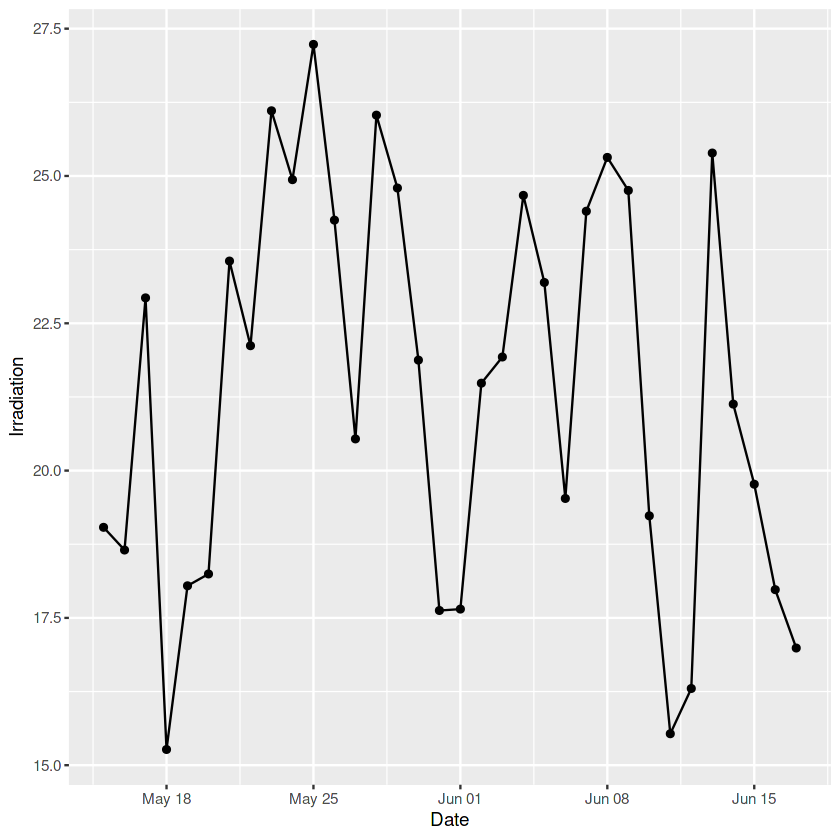

In [22]:
plant_env_data_1 %>%
  mutate(date = date(DATE_TIME))%>%
  group_by(date)%>%
  summarise(sum_irradiation_plant1 = sum(IRRADIATION))%>%
  ggplot(aes(x = date, y = sum_irradiation_plant1, group = 1))+geom_point()+geom_line()+labs(x = "Date", y = "Irradiation")

## If not changed in your sheet for date and time in seperate col now we need to mutate data

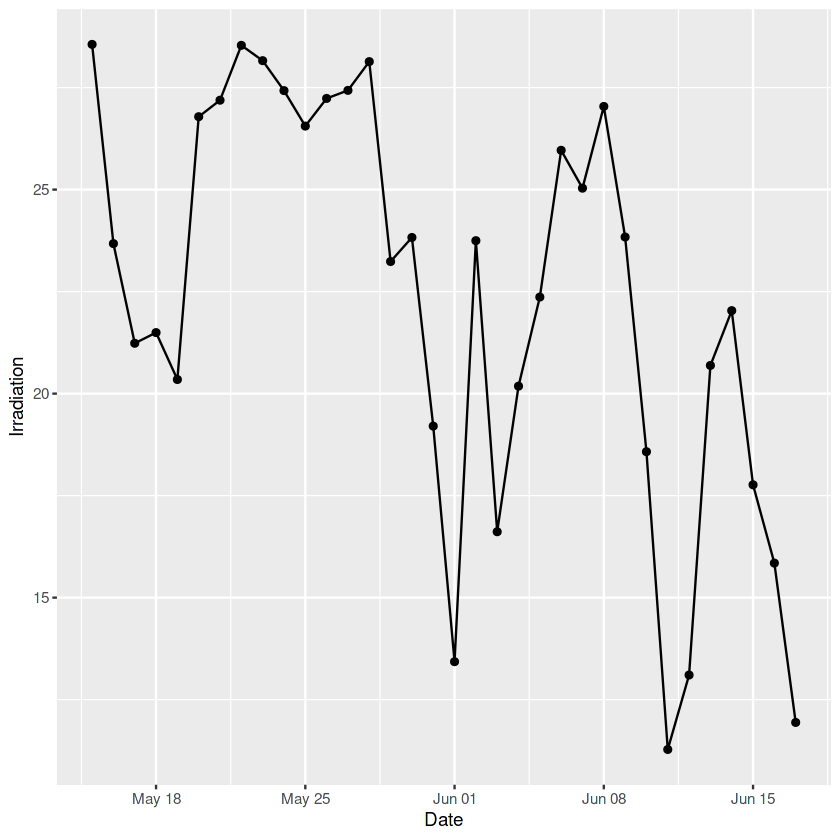

In [23]:

plant_env_data_2 %>%
  mutate(Date = date(DATE_TIME))%>%
  group_by(Date)%>%
  summarise(sum_irradiation_plant2 = sum(IRRADIATION))%>%
  ggplot(aes(x = Date, y = sum_irradiation_plant2, group = 1))+geom_point()+geom_line()+labs(x = "Date", y = "Irradiation")

## Ploting a graph to know the max and min AC and DC per date production and show which device produce the max power
### plant 1 AC and DC

#### AC for plant 1

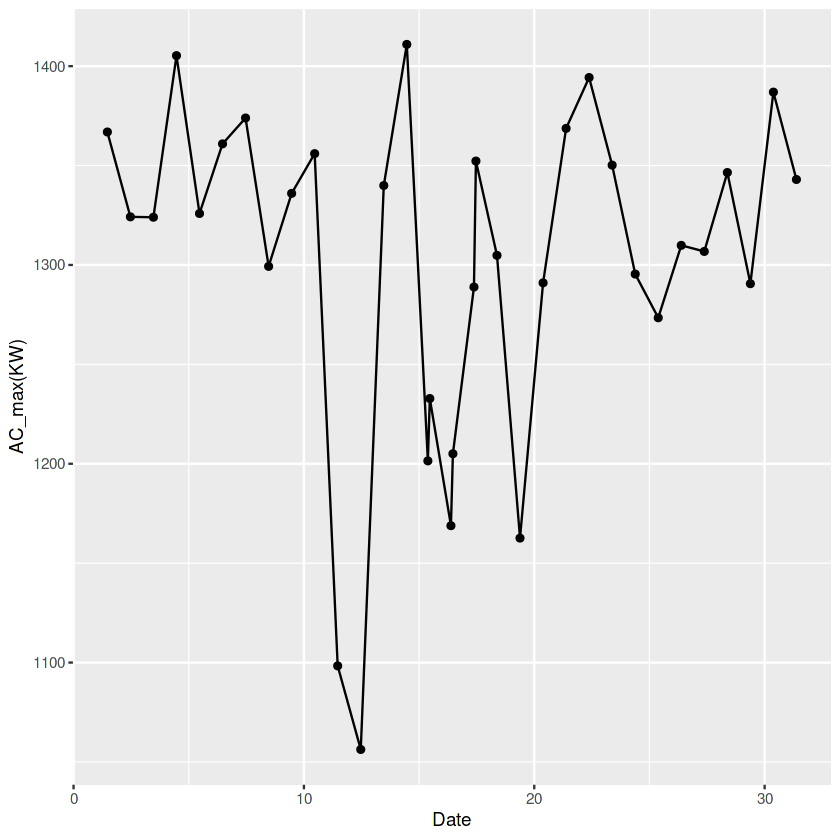

In [24]:
plant1_AC <- plant_1_Data%>%
mutate(Date = date(DATE_TIME))%>%
  group_by(Date)%>%
  summarize(acMAX = max(AC_POWER), acMIN = min(AC_POWER))

plant1_AC%>%
  ggplot(aes(x = Date, y = acMAX, group = 1))+geom_point()+geom_line()+labs(x = "Date", y = "AC_max(KW)")

### This does't matter as we know we will be getting 0 as for night no power is generated same for dc 

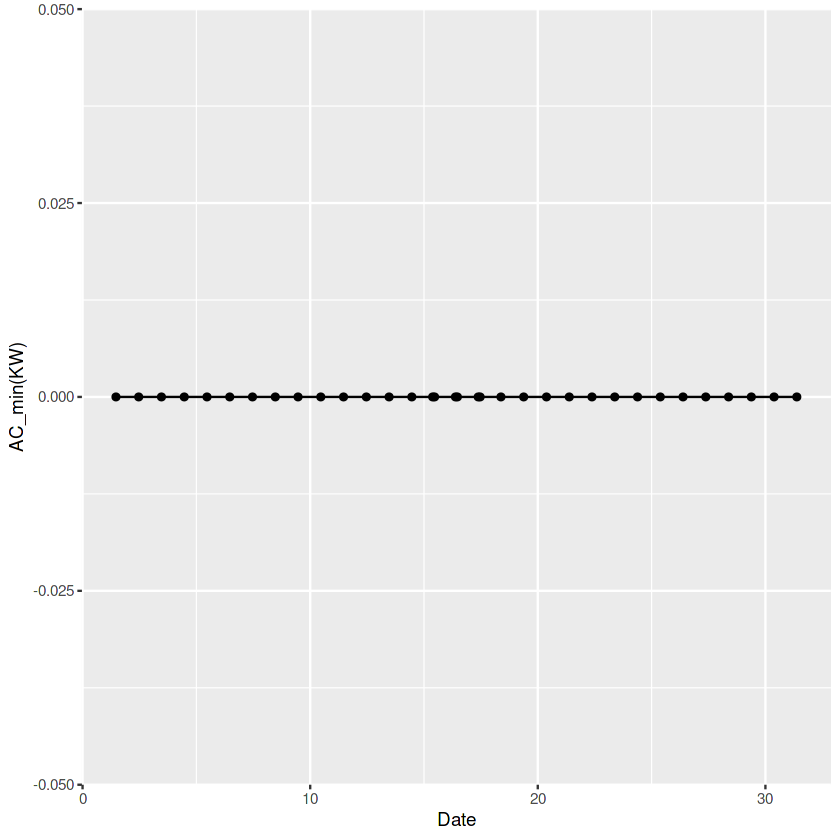

In [25]:
plant1_AC%>%
  ggplot(aes(x = Date, y = acMIN, group = 1))+geom_point()+geom_line()+labs(x = "Date", y = "AC_min(KW)")


### Dc for plant 1

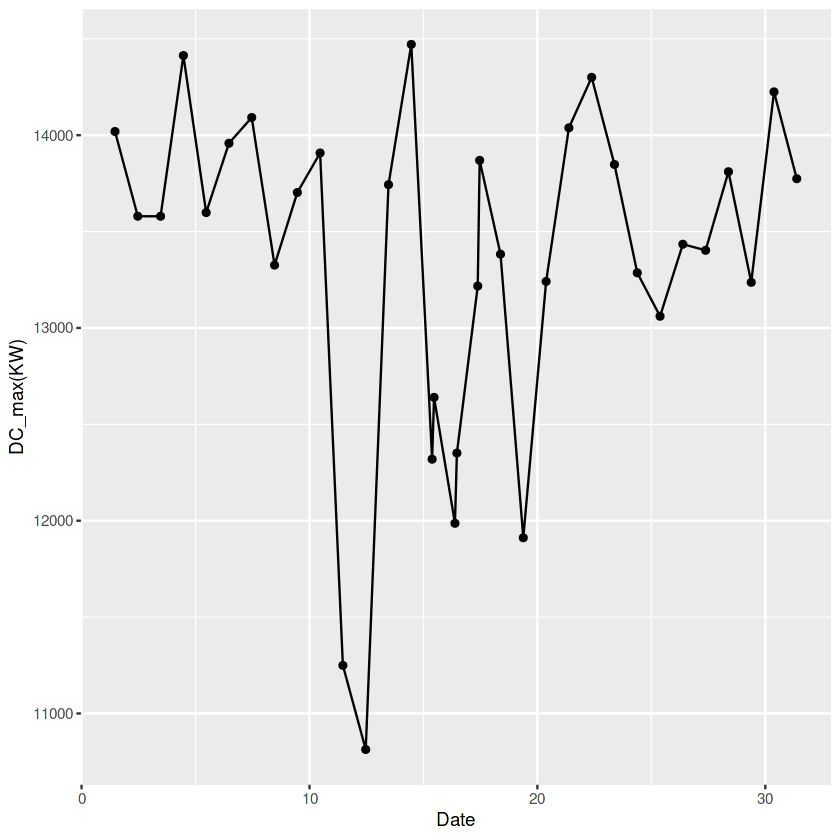

In [26]:

plant1_DC <- plant_1_Data%>%
mutate(Date = date(DATE_TIME))%>%
  group_by(Date)%>%
  summarize(dcMAX = max(DC_POWER), dcMIN = min(DC_POWER))

plant1_DC%>%
  ggplot(aes(x = Date, y = dcMAX, group = 1))+geom_point()+geom_line()+labs(x = "Date", y = "DC_max(KW)")

### Device which provides max ac

In [27]:
plant_1_Data%>%
  filter(AC_POWER == max(AC_POWER))%>%
  select(device_id = SOURCE_KEY)

plant_1_Data%>%
  filter(DC_POWER == max(DC_POWER))%>%
  select(device_id = SOURCE_KEY)

device_id
<chr>
wCURE6d3bPkepu2


device_id
<chr>
wCURE6d3bPkepu2


# Plant 2 AC and DC

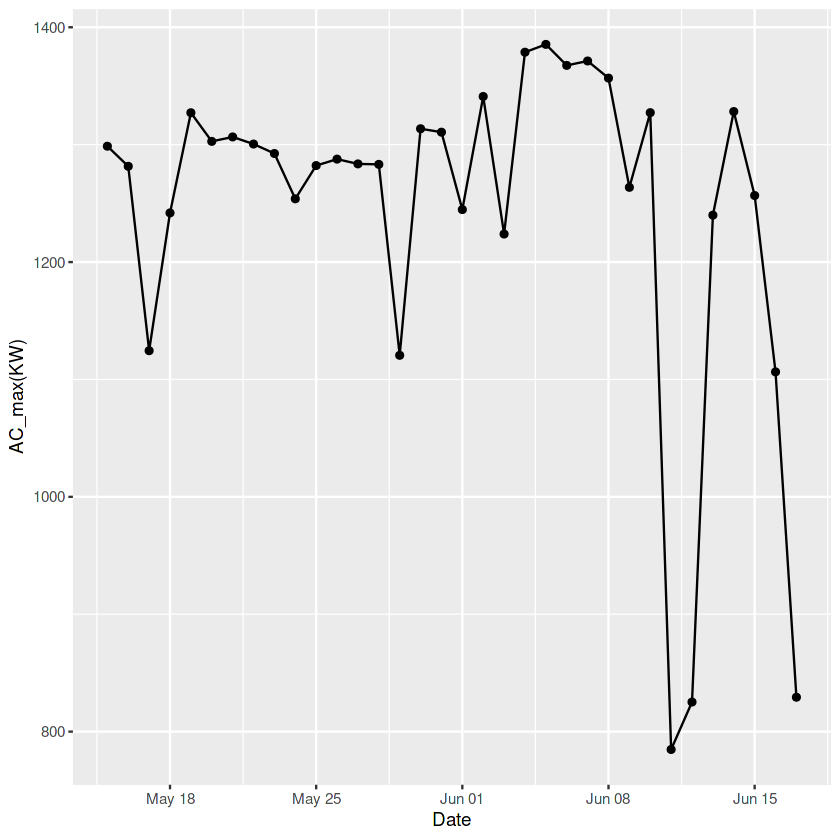

In [28]:
plant_2_Data <- plant_2_Data %>%
  mutate(Date = date(DATE_TIME))

plant2_AC <- plant_2_Data%>%
  group_by(Date)%>%
  summarize(acMAX_2 = max(AC_POWER), acMIN_2 = min(AC_POWER))

plant2_AC%>%
  ggplot(aes(x = Date, y = acMAX_2, group = 1))+geom_point()+geom_line()+labs(x = "Date", y = "AC_max(KW)")

## This does't matter as we know we will be getting 0 as for night no power is generated same for dc 

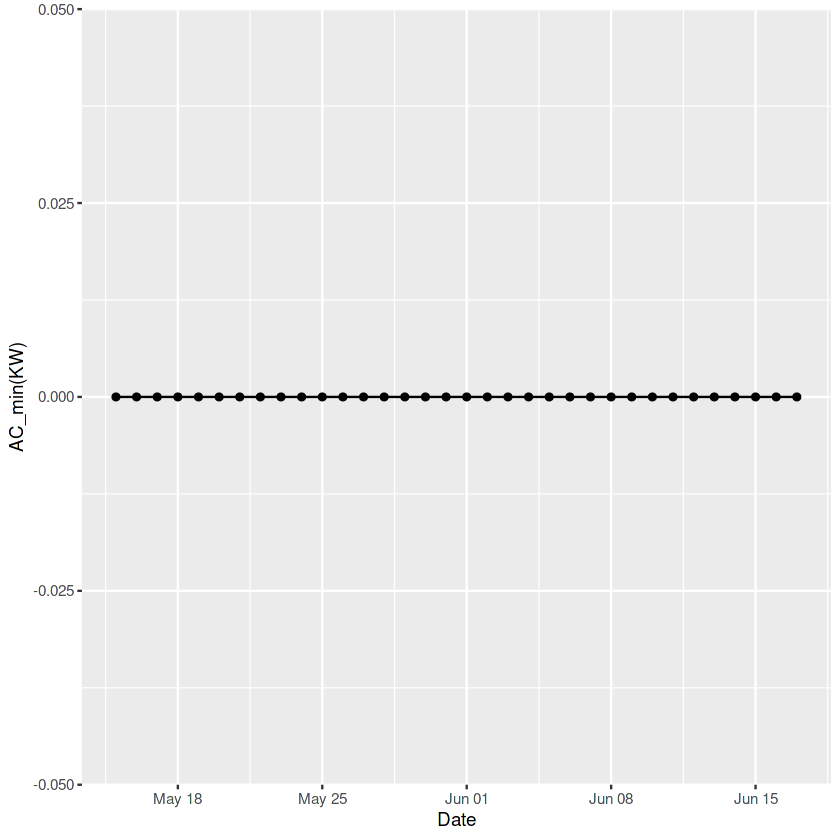

In [29]:
plant2_AC%>%
  ggplot(aes(x = Date, y = acMIN_2, group = 1))+geom_point()+geom_line()+labs(x = "Date", y = "AC_min(KW)")


## Dc for plant 1

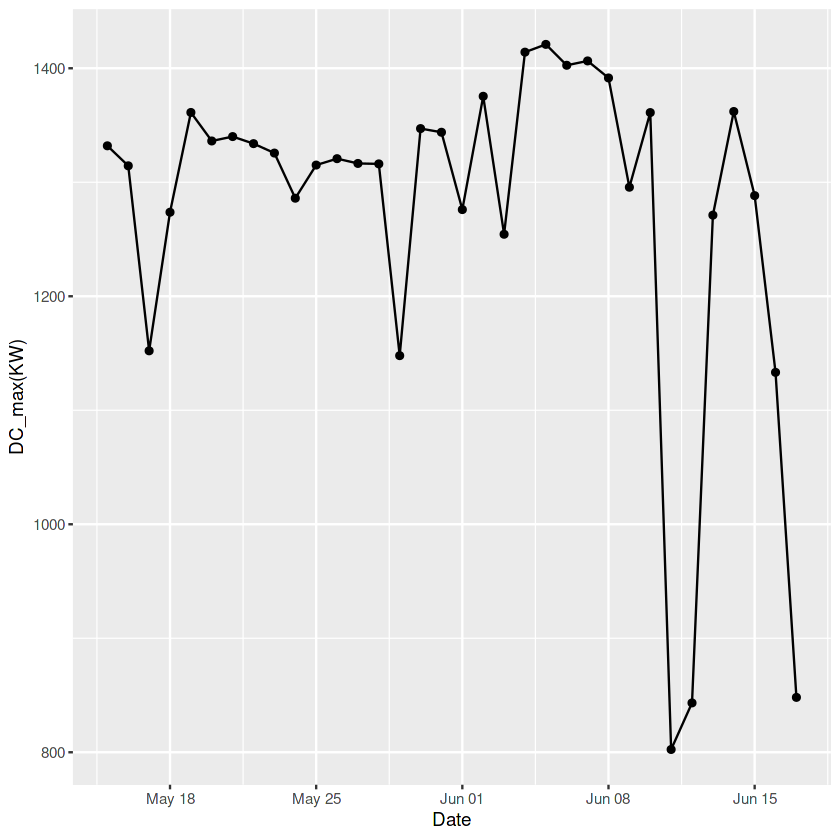

In [30]:

plant2_DC <- plant_2_Data%>%
  group_by(Date)%>%
  summarize(dcMAX_2 = max(DC_POWER), dcMIN_2 = min(DC_POWER))

plant2_DC%>%
  ggplot(aes(x = Date, y = dcMAX_2 , group = 1))+geom_point()+geom_line()+labs(x = "Date", y = "DC_max(KW)")

## Device which provides max ac

In [31]:
plant_2_Data%>%
  filter(AC_POWER == max(AC_POWER))%>%
  select(device_id = SOURCE_KEY)

plant_2_Data%>%
  filter(DC_POWER == max(DC_POWER))%>%
  select(device_id = SOURCE_KEY)

device_id
<chr>
oZ35aAeoifZaQzV


device_id
<chr>
oZ35aAeoifZaQzV


## RANK the devices through its id
#### note we find the graph char for ac and dc are similar hence AC or Dc power can be choose
#### plant 1 creating table to store the rank of device
##### can also add DC_POWER if needed



In [32]:
Rank_devices_plant1 <- plant_1_Data%>%
  group_by(SOURCE_KEY)%>%
  select(SOURCE_KEY, AC_POWER, DC_POWER )%>%
  summarise(AC_POWER = sum(AC_POWER), DC_POWER = sum(DC_POWER))%>%
  arrange(desc(AC_POWER, DC_POWER))%>%
  mutate(RANK = dense_rank(interaction(desc(AC_POWER)))) %>%
  select(RANK,SOURCE_KEY, AC_POWER, DC_POWER)

head(Rank_devices_plant1)

RANK,SOURCE_KEY,AC_POWER,DC_POWER
<int>,<chr>,<dbl>,<dbl>
1,adLQvlD726eNBSB,997125.2,10197782
2,1IF53ai7Xc0U56Y,984007.2,10062944
3,VHMLBKoKgIrUVDU,983449.0,10057251
4,3PZuoBAID5Wc2HD,982068.2,10043127
5,McdE0feGgRqW7Ca,981080.7,10032124
6,ZnxXDlPa8U1GXgE,977644.3,9997405


### Plant 2 creating table to store the rank of device


In [33]:
Rank_devices_plant2 <- plant_2_Data%>%
  group_by(SOURCE_KEY)%>%
  select(SOURCE_KEY, AC_POWER, DC_POWER)%>%
  summarise(AC_POWER = sum(AC_POWER),DC_POWER = sum(DC_POWER))%>%
  arrange(desc(AC_POWER))%>%
  mutate(RANK = dense_rank(interaction(desc(AC_POWER)))) %>%
  select(RANK,SOURCE_KEY, AC_POWER, DC_POWER)

head(Rank_devices_plant2)

RANK,SOURCE_KEY,AC_POWER,DC_POWER
<int>,<chr>,<dbl>,<dbl>
1,Mx2yZCDsyf6DPfv,890317.3,910617.3
2,Qf4GUc1pJu5T6c6,870755.7,890596.3
3,4UPUqMRk7TRMgml,867688.2,887444.9
4,oZ35aAeoifZaQzV,865435.8,885151.9
5,V94E5Ben1TlhnDV,835443.6,854375.7
6,vOuJvMaM2sgwLmb,835012.2,854172.9
